# Fintech545 Assignment1
## September 9, 2022

In [158]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1. Problem 1
The conditional expectation of the multivariate normal should be equal to the expected value from an OLS regression. Use the data in problem1.csv to prove this empirically. Prove mathematically that the expected value from both equations are the same.
#### 1.1 Prove it empirically
From the lecture, we know that the conditional expectation of the multivariate normal is $$\bar{\mu}=\mu_1+\Sigma_{12}\Sigma_{22}^{-1}(a-\mu_2)$$

In [159]:
data = pd.read_csv("problem1.csv")
x = data['x']
y = data['y']
data

,x,y
0,-1.166289,1.014680
1,-0.426878,0.262715
2,-1.477892,-1.044772
3,3.049119,0.804363
4,-2.123732,-0.689514
...,...,...
95,-0.588599,0.652704
96,-0.218138,0.067676
97,0.342822,1.214472
98,0.337376,0.608974


We found that there are only 2 variables in the data so we are dealing with bivariate case. The conditional expectation of the bivariate normal is $$\mu=\mu_1+\sigma_{12}\sigma_{22}^{-1}(a-\mu_2)$$ In this problem y is x1 and x is x2 which is known and we assumed x2 = a in lecture. The equation becomes $$\mu=\bar{y}+\frac{Cov(x,y)}{Var(x)}(x-\bar{x})$$ 
$\bar{x}$ and $\bar{y}$ are the means of x and y.
Next, we use statistical methods from python libraries to calculate the conditional expectation.

In [160]:
y_bar = np.mean(y)
x_bar = np.mean(x)
cov_xy = np.cov([x,y])[0][1]
var_x = np.cov([x,y])[0][0]
mu = y_bar+cov_xy/var_x*(x-x_bar)
mu

0    -0.461299
1    -0.144828
2    -0.594666
3     1.342911
4    -0.871088
        ...   
95   -0.214046
96   -0.055487
97    0.184606
98    0.182275
99    0.531715
Name: x, Length: 100, dtype: float64

Next, we fit the data to an OLS regression model.

In [161]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
fit_y = results.params['x']*x+results.params['const']

7.20430659573168e-15


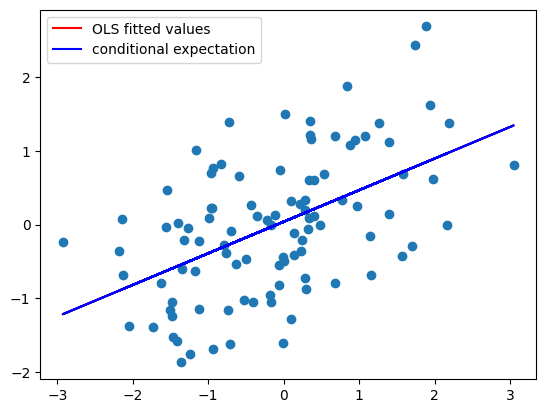

In [162]:
plt.plot(x,y,'o')
plt.plot(x,fit_y,color='r',label = 'OLS fitted values')
plt.plot(x,mu,color='b', label = 'conditional expectation')
plt.legend()
fit_y.tolist().sort()
mu.tolist().sort()
print(sum(fit_y-mu))

From the graph, we can see that the line of fitted y(red line) and the line of the conditional expectation of bivariate normal overlap. We then calculate the sum of the difference between those sorted values and we got 7.2e^15 which is basically 0. Therefore, we proved that the conditional expectation of the multivariate normal is equal to the expected value from an OLS regression empirically.

#### 1.1 Prove it mathematically
From the lecture, we know that $$\hat{\beta_i} = \frac{Cov(x_i,y)}{{\sigma_y}^2}$$ and we can the OLS for two variables is $$y=\alpha+{\beta}x+\epsilon$$ Since the error term disappears after taking the expectation on both sides, what we really have is $$\hat{y}=\hat{\alpha}+\hat{\beta}x$$ We also know that for OLS $$\hat{\alpha} = \bar{y}-\hat{\beta}\bar{x}$$ Combining the two equations above, we get $$\hat{y}=\bar{y}-\hat{\beta}\bar{x}+\hat{\beta}x$$ which is $$\hat{y}=\bar{y}+\hat{\beta}(x-\bar{x})$$ From the lecture, we know that $$\beta = (X'X)^{-1}X'Y$$ and X in this case is [1 x] and $\beta$ in this case is [$\alpha$ $\beta$]. Therefore, we can find that $\beta$ in our problem is $$\frac{Cov(x,y)}{Var(x)}$$ Therefore, we have the expectation for $\mu = \bar{y}+\frac{Cov(x,y)}{Var(x)}(x-\bar{x})$ and the expectation for fitted OLS$\hat{y}=\bar{y}+\frac{Cov(x,y)}{Var(x)}(x-\bar{x})$ and they are exactly the same.

### 2. Problem 2
Fit the data in problem2.csv using OLS and calculate the error vector. Look at its distribution. How well does it fit the assumption of normally distributed errors?
Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?
What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case?

First we fit the data to an OLS model

In [163]:
data = pd.read_csv("problem2.csv")
x = data['x']
y = data['y']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
results.params

const    0.119836
x        0.605205
dtype: float64

Then we get the error vector by substracting the fitted y values from the actual y values

In [164]:
error = y - results.params['x']*x+results.params['const']
error

0    -0.598812
1     1.074968
2     1.267101
3     1.559383
4     0.087356
        ...   
95   -1.350591
96   -1.455176
97    0.674550
98    0.641934
99   -0.682646
Length: 100, dtype: float64

Next, we plot the error vector in a histogram

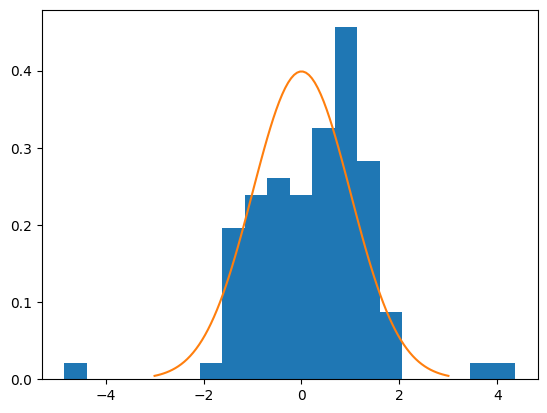

In [165]:
plt.hist(error, bins = 20, density = True)
x_axis = np.linspace(-3, 3, 100)
plt.plot(x_axis, norm.pdf(x_axis, 0,1))

From the graph, we can see that the error vector does not fit the normal distribution.
Next, we fit the data using MLE with the first assumption that the error follows a normal distribution and with the second assumption that the error follows the T-distribution

In [166]:
from scipy import stats
from scipy.optimize import minimize 

def MLE_N(p):
   fitted = p[0] + p[1]*x
   return -1*np.sum(stats.norm.logpdf(y, fitted, p[2])) 
def MLE_T(p):
   fitted = p[0] + p[1]*x
   return -1*np.sum(stats.t.logpdf(y-fitted, p[2],scale=p[3])) 
mle_N = minimize(MLE_N, x0=(1,1,1))
mle_T = minimize(MLE_T, x0=(1,1,10,1))
print(mle_N.x,mle_T.x)

[0.11983616 0.60520482 1.19839405] [0.14261403 0.55757181 6.27655964 0.97126593]


For the model that assumes error has a normal distribution, $\alpha$ is 0.11983616 and $\beta$ is 0.60520482. For the model that assumes error has a T distribution, $\alpha$ is 0.14261403 and $\beta$ is 0.55757181. Next, we use different criterias to test which model is better. 

In [167]:
SS_total = sum([i**2 for i in (y-np.mean(y))])
error_N = y - 0.60520482*x+0.11983616
SS_error_N = sum([i**2 for i in (error_N-np.mean(error_N))])
RR_N = 1-SS_error_N/SS_total
error_T = y - 0.55757181*x+0.14261403
SS_error_T = sum([i**2 for i in (error_T-np.mean(error_T))])
RR_T = 1-SS_error_T/SS_total
RR_N,RR_T

(0.194639523918951, 0.19343381555614025)

By calculating R-Square, we conclude that the model that assumes error has a normal distribution is a better fit as it has a greater R^2 value.

In [168]:
AIC_N = 2*3+2*mle_N.fun
AIC_T = 2*4+2*mle_T.fun
AIC_N,AIC_T

(325.98419337832564, 318.9459408249327)

By calculating AIC, we conclude that the model that assumes error has a normal distribution is a better fit as it has a greater AIC value.

In [169]:
BIC_N = 3*np.log(len(y))+2*mle_N.fun
BIC_T = 4*np.log(len(y))+2*mle_T.fun
BIC_N,BIC_T

(333.7997039362899, 329.366621568885)

By calculating BIC, we conclude that the model that assumes error has a normal distribution is a better fit as it has a greater BIC value.

Therefore, we conclude that the model that assumes error has a normal distribution is better because it shows a better fit in all 3 criterias. The parameters for normal distribution assumption model are $\alpha = 0.11983616$ and $\beta = 0.60520482$.The parameters for T distribution assumption model are $\alpha = 0.14261403$ and $\beta = 0.55757181$. This tells us that with different assumptions on the distribution of the error vector, the fitted values will be different and therefore, it's important to find which ditribution the error vector fits into before we do the OLS regression. We can't not break the normality assumption in this case as the normality assumption model is better than T-distribution assumption model.

### 3. Problem 3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


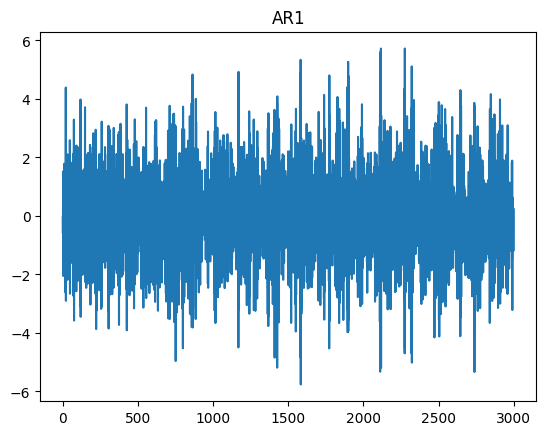

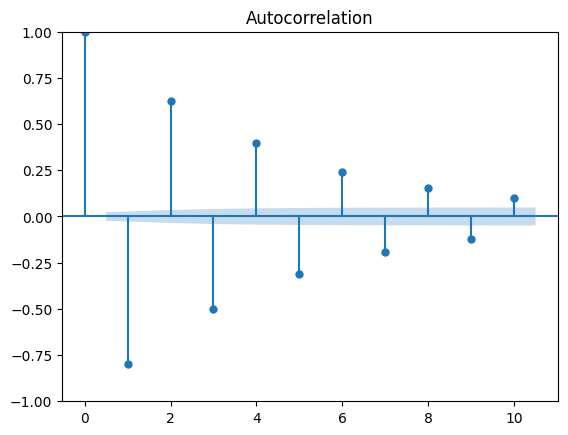

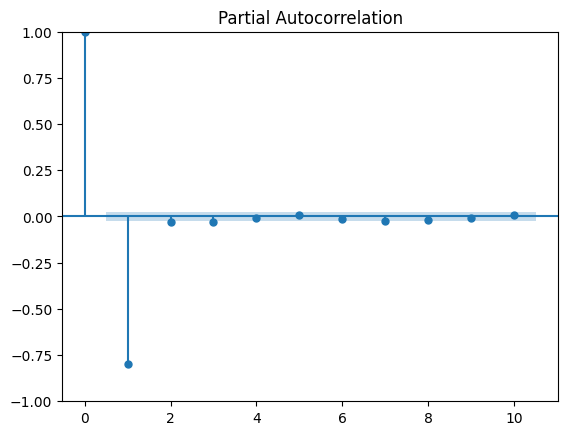

In [170]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
AR1_process = ArmaProcess(ar=[1,0.8])
simulation = AR1_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("AR1")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


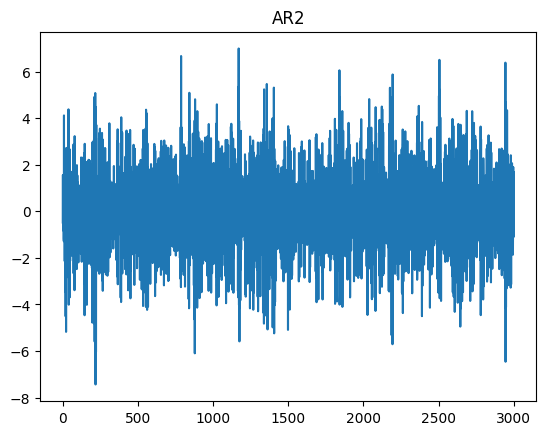

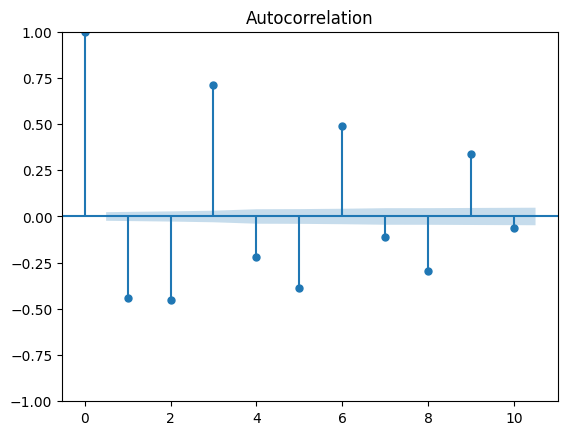

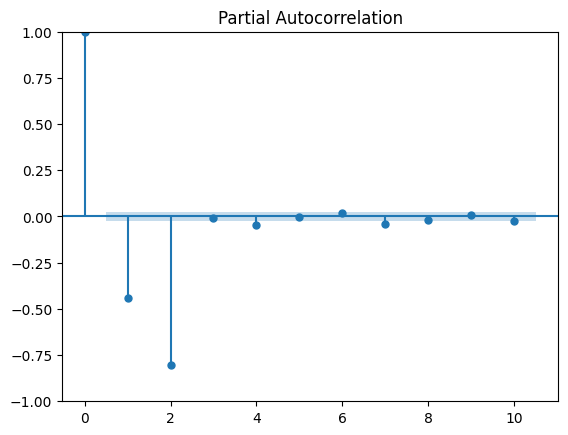

In [171]:
AR2_process = ArmaProcess(ar=[1,0.8,0.8])
simulation = AR2_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("AR2")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


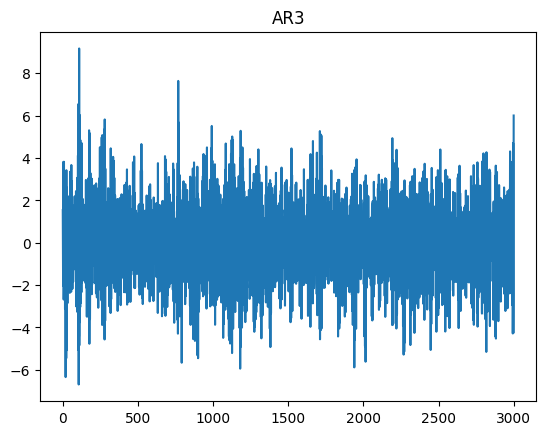

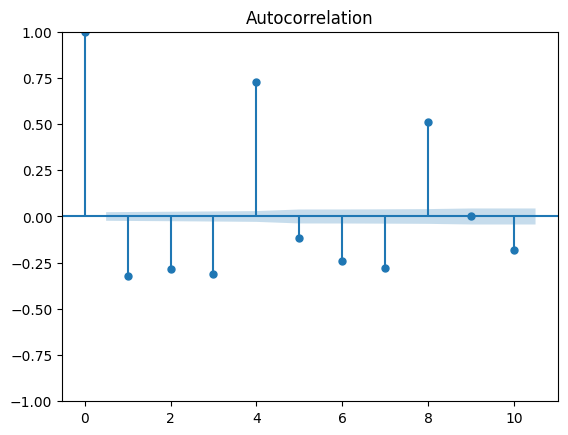

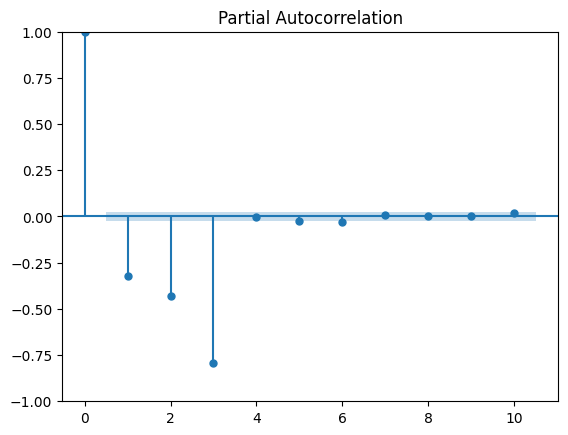

In [172]:
AR3_process = ArmaProcess(ar=[1,0.8,0.8,0.8])
simulation = AR3_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("AR3")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


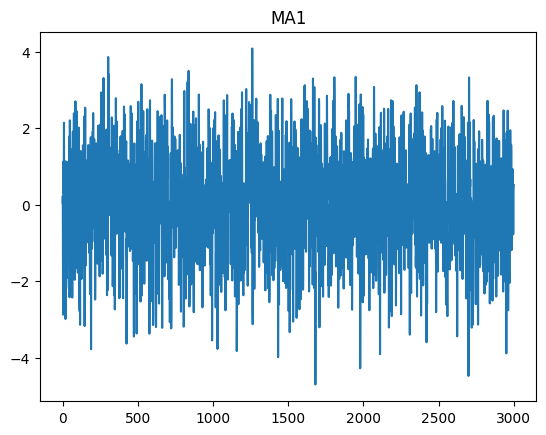

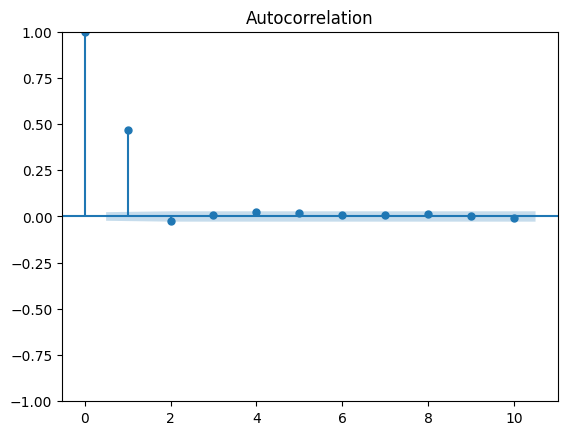

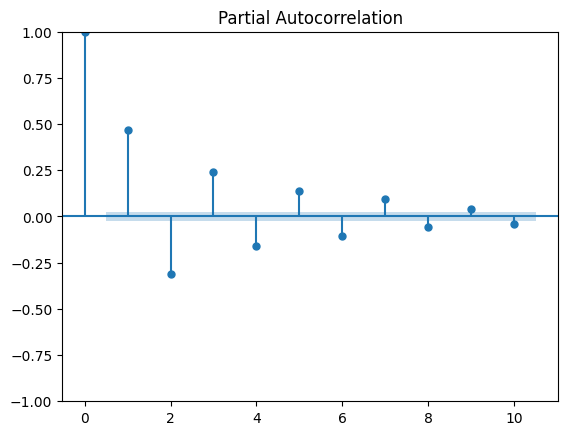

In [173]:
MA1_process = ArmaProcess(ma=[1,0.8])
simulation = MA1_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("MA1")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


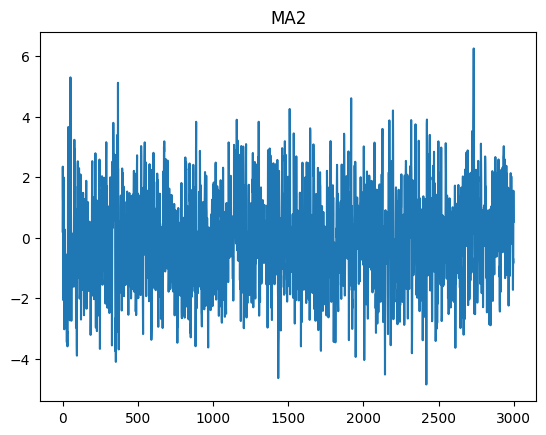

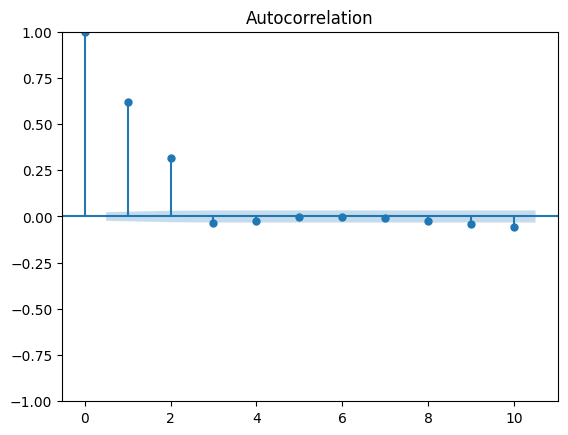

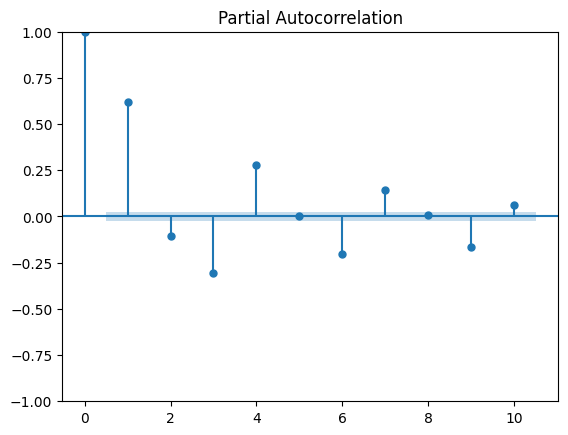

In [174]:
MA2_process = ArmaProcess(ma=[1,0.8,0.8])
simulation = MA2_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("MA2")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


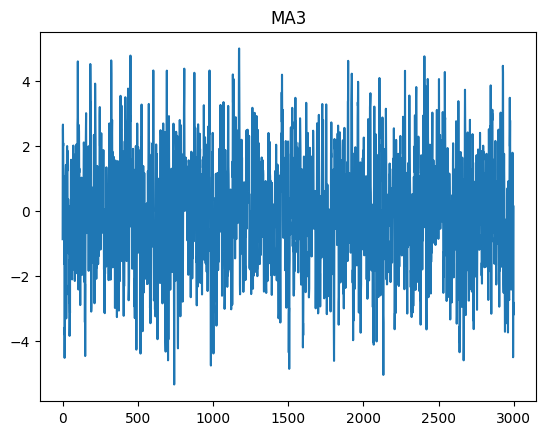

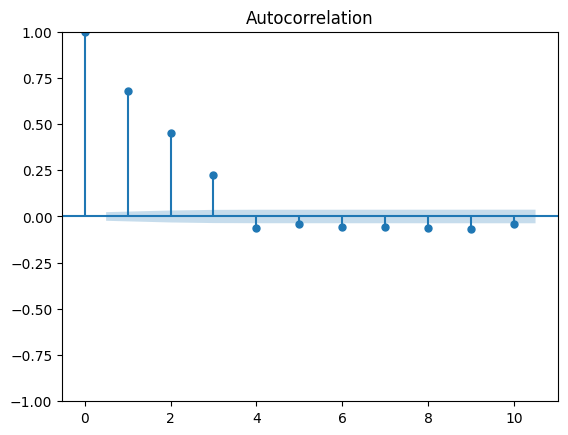

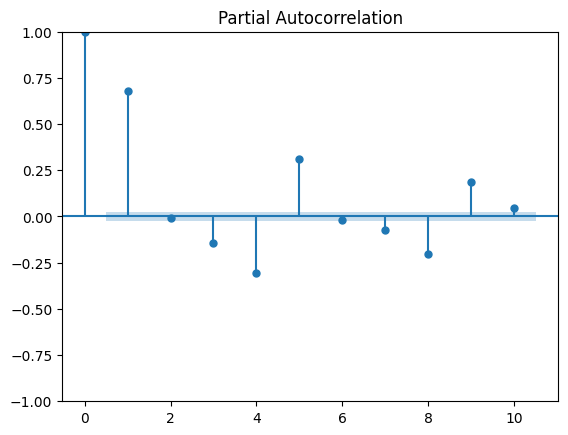

In [175]:
MA3_process = ArmaProcess(ma=[1,0.8,0.8,0.8])
simulation = MA3_process.generate_sample(nsample=3000)
plt.plot(simulation)
plt.title("MA3")
fig = plot_acf(simulation, alpha=0.2, lags=10)
fig = plot_pacf(simulation, alpha=0.2, lags=10)

First we look at the graphs of ACF. If the absolute value of lags drops immediately to 0 at some point, then the process is MA and the order is the number of lags with non-zero values -1. If the absolute value of lags decreases in a smooth trend, then the process is AR and the order of the process is the number of lags with negative values consecutively. Next, we look at the graphs of PCF. If the value of lags immediately to 0 at some point, then the process is AR and the order is the number of lags with negative values. If the value of lags fluctuates, then the process is MA and the order is the number of lags between two ridges.